In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

In [2]:
inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

In [4]:
sucessive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t), + b)
    sucessive_outputs.append(output_t)
    state_t = output_t
    

In [5]:
final_output_sequence = np.stack(sucessive_outputs, axis=0)

from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

num_words = 10000
max_len = 500
batch_size =32

In [9]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
intput_test = sequence.pad_sequences(input_test, maxlen=max_len)
print(input_train.shape)
print(intput_test.shape)


25000
25000
(25000, 500)
(25000, 500)


In [10]:
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Embedding(num_words,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(input_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

Epoch 1/3
157/157 [==============================] - 97s 616ms/step - loss: 0.5844 - acc: 0.6992 - val_loss: 0.4799 - val_acc: 0.7978
Epoch 2/3
157/157 [==============================] - 96s 612ms/step - loss: 0.3455 - acc: 0.8584 - val_loss: 0.4210 - val_acc: 0.8076
Epoch 3/3
157/157 [==============================] - 95s 604ms/step - loss: 0.2335 - acc: 0.9085 - val_loss: 0.3866 - val_acc: 0.8356


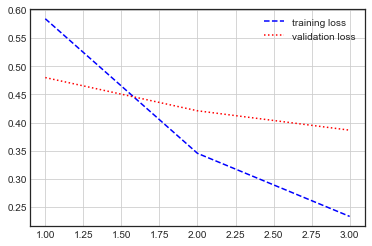

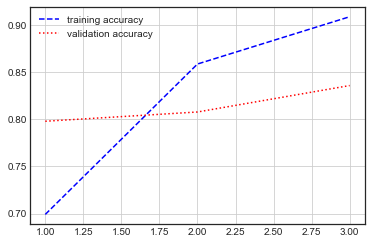

In [13]:
epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [17]:
model.evaluate(input_train, y_test)

782/782 [==============================] - 58s 75ms/step - loss: 1.5340 - acc: 0.4976


[1.5340380668640137, 0.4976400136947632]

In [18]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words= 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

25000
25000


In [19]:
pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding

model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
157/157 [==============================] - 5s 24ms/step - loss: 0.5325 - acc: 0.7534 - val_loss: 0.4162 - val_acc: 0.8152


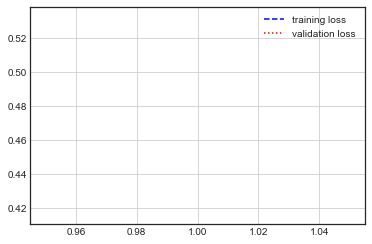

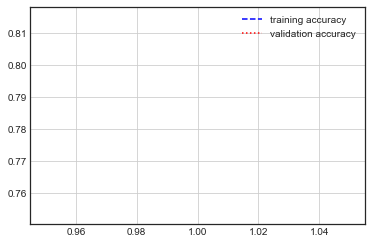

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(pad_x_train, y_train, epochs=1, batch_size=128, validation_split=0.2)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [23]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.4132 - acc: 0.8188


[0.41323110461235046, 0.8188400268554688]

In [24]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 300

pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(len(pad_x_train[0]))

pad_x_train[5]


300


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 256)         2560000   
                                                                 
 gru (GRU)                   (None, None, 256)         394752    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_2 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
225/225 [==============================] - 10s 33ms/step - loss: 1.9857 - acc: 0.4856 - val_loss: 1.6802 - val_acc: 0.5582
Epoch 2/20
225/225 [==============================] - 7s 31ms/step - loss: 1.5498 - acc: 0.6026 - val_loss: 1.5704 - val_acc: 0.6016
Epoch 3/20
225/225 [==============================] - 7s 31ms/step - loss: 1.1826 - acc: 0.6907 - val_loss: 1.3342 - val_acc: 0.6761
Epoch 4/20
225/225 [==============================] - 7s 31ms/step - loss: 0.8957 - acc: 0.7695 - val_loss: 1.2996 - val_acc: 0.6923
Epoch 5/20
225/225 [==============================] - 7s 31ms/step - loss: 0.6461 - acc: 0.8365 - val_loss: 1.3226 - val_acc: 0.6895
Epoch 6/20
225/225 [==============================] - 7s 33ms/step - loss: 0.4850 - acc: 0.8750 - val_loss: 1.3803 - val_acc: 0.7028
Epoch 7/20
225/225 [==============================] - 7s 32ms/step - loss: 0.3758 - acc: 0.9041 - val_loss: 1.3493 - val_acc: 0.7134
Epoch 8/20
225/225 [==============================] - 7s 32ms/step -

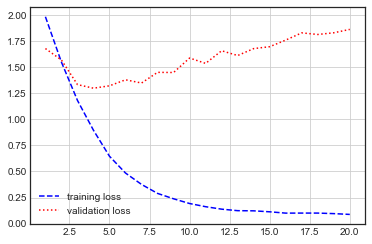

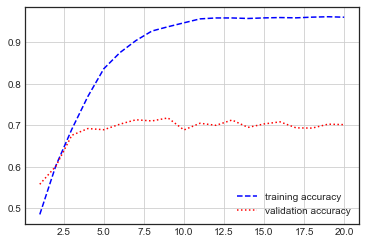

71/71 [==============================] - 1s 13ms/step - loss: 1.9561 - acc: 0.6901


[1.9561293125152588, 0.690115749835968]

In [27]:
history = model.fit(pad_x_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

model.evaluate(pad_x_test, y_test)
